# Share Price Analysis

## Polygon.io REST API

In [1]:
import os

from dotenv import load_dotenv
from matplotlib import pyplot as plt

load_dotenv()

True

In [2]:
import os
import time
from polygon import RESTClient

polygon_api_key = os.getenv("POLYGON_API_KEY")

if not polygon_api_key:
    raise ValueError("A variável de ambiente POLYGON_API_KEY não foi definida.")

client = RESTClient(api_key=polygon_api_key)

### Get All Tickers

In [3]:
tickers = []
limit_per_request = 100
requests_per_minute = 5
delay = 60.0 / requests_per_minute
tickers_limit = 10

print("Iniciando a coleta de tickers...")

try:
    for i, t in enumerate(client.list_tickers(
        market="stocks",
        active=True,
        limit=limit_per_request,
        sort="ticker",
    )):
        tickers.append(t)
        if (i + 1) % limit_per_request == 0:
            print(f"Coletados {len(tickers)} tickers. Aguardando {delay:.1f} segundos para não exceder o limite...")
            time.sleep(delay)
        if i + 1 == tickers_limit:
            break

except Exception as e:
    print(f"Ocorreu um erro: {e}")

print(f"\nColeta finalizada. Total de tickers coletados: {len(tickers)}")
print(tickers)

Iniciando a coleta de tickers...

Coleta finalizada. Total de tickers coletados: 10
[Ticker(active=True, cik='0001090872', composite_figi='BBG000C2V3D6', currency_name='usd', currency_symbol=None, base_currency_symbol=None, base_currency_name=None, delisted_utc=None, last_updated_utc='2025-09-09T06:05:20.088798087Z', locale='us', market='stocks', name='Agilent Technologies Inc.', primary_exchange='XNYS', share_class_figi='BBG001SCTQY4', ticker='A', type='CS', source_feed=None), Ticker(active=True, cik='0001675149', composite_figi='BBG00B3T3HD3', currency_name='usd', currency_symbol=None, base_currency_symbol=None, base_currency_name=None, delisted_utc=None, last_updated_utc='2025-09-09T06:05:20.088798738Z', locale='us', market='stocks', name='Alcoa Corporation', primary_exchange='XNYS', share_class_figi='BBG00B3T3HF1', ticker='AA', type='CS', source_feed=None), Ticker(active=True, cik='0001776878', composite_figi='BBG01B0JRCS6', currency_name='usd', currency_symbol=None, base_currency_

In [4]:
for i, ticker in enumerate(tickers):
    print(f'===== Ticker {i + 1} =====')
    print(ticker)
    print()

===== Ticker 1 =====
Ticker(active=True, cik='0001090872', composite_figi='BBG000C2V3D6', currency_name='usd', currency_symbol=None, base_currency_symbol=None, base_currency_name=None, delisted_utc=None, last_updated_utc='2025-09-09T06:05:20.088798087Z', locale='us', market='stocks', name='Agilent Technologies Inc.', primary_exchange='XNYS', share_class_figi='BBG001SCTQY4', ticker='A', type='CS', source_feed=None)

===== Ticker 2 =====
Ticker(active=True, cik='0001675149', composite_figi='BBG00B3T3HD3', currency_name='usd', currency_symbol=None, base_currency_symbol=None, base_currency_name=None, delisted_utc=None, last_updated_utc='2025-09-09T06:05:20.088798738Z', locale='us', market='stocks', name='Alcoa Corporation', primary_exchange='XNYS', share_class_figi='BBG00B3T3HF1', ticker='AA', type='CS', source_feed=None)

===== Ticker 3 =====
Ticker(active=True, cik='0001776878', composite_figi='BBG01B0JRCS6', currency_name='usd', currency_symbol=None, base_currency_symbol=None, base_curr

### Ticker Overview

In [5]:
details = client.get_ticker_details(
	"AAPL",
)
details

TickerDetails(active=True, address=CompanyAddress(address1='ONE APPLE PARK WAY', address2=None, city='CUPERTINO', state='CA', country=None, postal_code='95014'), branding=Branding(icon_url='https://api.polygon.io/v1/reference/company-branding/YXBwbGUuY29t/images/2025-04-04_icon.png', logo_url='https://api.polygon.io/v1/reference/company-branding/YXBwbGUuY29t/images/2025-04-04_logo.svg', accent_color=None, light_color=None, dark_color=None), cik='0000320193', composite_figi='BBG000B9XRY4', currency_name='usd', currency_symbol=None, base_currency_name=None, base_currency_symbol=None, delisted_utc=None, description="Apple is among the largest companies in the world, with a broad portfolio of hardware and software products targeted at consumers and businesses. Apple's iPhone makes up a majority of the firm sales, and Apple's other products like Mac, iPad, and Watch are designed around the iPhone as the focal point of an expansive software ecosystem. Apple has progressively worked to add ne

### Daily Market Summary (OHLC)

In [6]:
grouped = client.get_grouped_daily_aggs(
    "2025-01-02",
    adjusted="true",
)
grouped

[GroupedDailyAgg(ticker='IDNA', open=22.75, high=23.0506, low=22.69, close=22.76, volume=20131, vwap=22.874, timestamp=1735851600000, transactions=211, otc=None),
 GroupedDailyAgg(ticker='INMU', open=23.69, high=23.69, low=23.5909, close=23.64, volume=10587, vwap=23.6286, timestamp=1735851600000, transactions=83, otc=None),
 GroupedDailyAgg(ticker='KPLT', open=6.76, high=6.9533, low=6.35, close=6.35, volume=15309, vwap=6.6367, timestamp=1735851600000, transactions=438, otc=None),
 GroupedDailyAgg(ticker='AVSC', open=54.98, high=55.03, low=53.7969, close=54.18, volume=64855, vwap=54.1614, timestamp=1735851600000, transactions=522, otc=None),
 GroupedDailyAgg(ticker='ELMD', open=29.81, high=30.31, low=29.21, close=30.1, volume=70217, vwap=29.8217, timestamp=1735851600000, transactions=2548, otc=None),
 GroupedDailyAgg(ticker='MDY', open=572.43, high=575.62, low=566.34, close=568.28, volume=1054125.0, vwap=569.8816, timestamp=1735851600000, transactions=17996, otc=None),
 GroupedDailyAgg(

In [7]:
len(grouped)

10870

In [8]:
tickers_list = [ticker.__dict__ for ticker in grouped]
tickers_list

[{'ticker': 'IDNA',
  'open': 22.75,
  'high': 23.0506,
  'low': 22.69,
  'close': 22.76,
  'volume': 20131,
  'vwap': 22.874,
  'timestamp': 1735851600000,
  'transactions': 211,
  'otc': None},
 {'ticker': 'INMU',
  'open': 23.69,
  'high': 23.69,
  'low': 23.5909,
  'close': 23.64,
  'volume': 10587,
  'vwap': 23.6286,
  'timestamp': 1735851600000,
  'transactions': 83,
  'otc': None},
 {'ticker': 'KPLT',
  'open': 6.76,
  'high': 6.9533,
  'low': 6.35,
  'close': 6.35,
  'volume': 15309,
  'vwap': 6.6367,
  'timestamp': 1735851600000,
  'transactions': 438,
  'otc': None},
 {'ticker': 'AVSC',
  'open': 54.98,
  'high': 55.03,
  'low': 53.7969,
  'close': 54.18,
  'volume': 64855,
  'vwap': 54.1614,
  'timestamp': 1735851600000,
  'transactions': 522,
  'otc': None},
 {'ticker': 'ELMD',
  'open': 29.81,
  'high': 30.31,
  'low': 29.21,
  'close': 30.1,
  'volume': 70217,
  'vwap': 29.8217,
  'timestamp': 1735851600000,
  'transactions': 2548,
  'otc': None},
 {'ticker': 'MDY',
  'op

In [9]:
import pandas as pd

df_polygon = pd.DataFrame(tickers_list)
df_polygon

,ticker,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,IDNA,22.750,23.0506,22.6900,22.760,20131.0,22.8740,1735851600000,211.0,None
1,INMU,23.690,23.6900,23.5909,23.640,10587.0,23.6286,1735851600000,83.0,None
2,KPLT,6.760,6.9533,6.3500,6.350,15309.0,6.6367,1735851600000,438.0,None
3,AVSC,54.980,55.0300,53.7969,54.180,64855.0,54.1614,1735851600000,522.0,None
4,ELMD,29.810,30.3100,29.2100,30.100,70217.0,29.8217,1735851600000,2548.0,None
...,...,...,...,...,...,...,...,...,...,...
10865,ZTEST,8662.955,8662.9550,8662.9550,8662.955,0.0,NaN,1735851600000,NaN,None
10866,ZIEXT,1.000,1.0000,1.0000,1.000,1000.0,1.0000,1735851600000,1.0,None
10867,ZEXIT,10.000,10.0000,10.0000,10.000,2000.0,10.0000,1735851600000,1.0,None
10868,ZXIET,100.000,100.0000,100.0000,100.000,2000.0,100.0000,1735851600000,1.0,None


### Close Statistics at 2025-01-02

In [10]:
df_polygon["close"].mean()

np.float64(163.43072661177553)

In [11]:
df_polygon["close"].std()

np.float64(8704.503425518993)

### Getting monthly data

#### AAPL

In [12]:
aggs_aapl = []
for a in client.list_aggs(
    "AAPL",
    1,
    "day",
    "2025-01-01",
    "2025-01-31",
    adjusted="true",
    sort="asc",
    limit=120,
):
    aggs_aapl.append(a)

print(aggs_aapl)

[Agg(open=248.93, high=249.1, low=241.8201, close=243.85, volume=55740731.0, vwap=244.3303, timestamp=1735794000000, transactions=685448, otc=None), Agg(open=243.36, high=244.18, low=241.89, close=243.36, volume=40244114.0, vwap=243.0805, timestamp=1735880400000, transactions=493786, otc=None), Agg(open=244.31, high=247.33, low=243.2, close=245, volume=45045571.0, vwap=245.1726, timestamp=1736139600000, transactions=493920, otc=None), Agg(open=242.98, high=245.55, low=241.35, close=242.21, volume=40855960.0, vwap=242.9459, timestamp=1736226000000, transactions=462887, otc=None), Agg(open=241.92, high=243.7123, low=240.05, close=242.7, volume=37628940.0, vwap=242.2995, timestamp=1736312400000, transactions=406916, otc=None), Agg(open=240.01, high=240.16, low=233, close=236.85, volume=61710856.0, vwap=236.6061, timestamp=1736485200000, transactions=685976, otc=None), Agg(open=233.53, high=234.67, low=229.72, close=234.4, volume=49630725.0, vwap=232.7529, timestamp=1736744400000, transact

In [13]:
aggs_aapl_list = [agg.__dict__ for agg in aggs_aapl]
aggs_aapl_list

[{'open': 248.93,
  'high': 249.1,
  'low': 241.8201,
  'close': 243.85,
  'volume': 55740731.0,
  'vwap': 244.3303,
  'timestamp': 1735794000000,
  'transactions': 685448,
  'otc': None},
 {'open': 243.36,
  'high': 244.18,
  'low': 241.89,
  'close': 243.36,
  'volume': 40244114.0,
  'vwap': 243.0805,
  'timestamp': 1735880400000,
  'transactions': 493786,
  'otc': None},
 {'open': 244.31,
  'high': 247.33,
  'low': 243.2,
  'close': 245,
  'volume': 45045571.0,
  'vwap': 245.1726,
  'timestamp': 1736139600000,
  'transactions': 493920,
  'otc': None},
 {'open': 242.98,
  'high': 245.55,
  'low': 241.35,
  'close': 242.21,
  'volume': 40855960.0,
  'vwap': 242.9459,
  'timestamp': 1736226000000,
  'transactions': 462887,
  'otc': None},
 {'open': 241.92,
  'high': 243.7123,
  'low': 240.05,
  'close': 242.7,
  'volume': 37628940.0,
  'vwap': 242.2995,
  'timestamp': 1736312400000,
  'transactions': 406916,
  'otc': None},
 {'open': 240.01,
  'high': 240.16,
  'low': 233,
  'close': 2

In [14]:
df_appl = pd.DataFrame(aggs_aapl_list)
df_appl

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,248.930,249.1000,241.8201,243.85,55740731.0,244.3303,1735794000000,685448,None
1,243.360,244.1800,241.8900,243.36,40244114.0,243.0805,1735880400000,493786,None
2,244.310,247.3300,243.2000,245.00,45045571.0,245.1726,1736139600000,493920,None
3,242.980,245.5500,241.3500,242.21,40855960.0,242.9459,1736226000000,462887,None
4,241.920,243.7123,240.0500,242.70,37628940.0,242.2995,1736312400000,406916,None
5,240.010,240.1600,233.0000,236.85,61710856.0,236.6061,1736485200000,685976,None
6,233.530,234.6700,229.7200,234.40,49630725.0,232.7529,1736744400000,561231,None
7,234.750,236.1200,232.4720,233.28,39435294.0,233.8731,1736830800000,436333,None
8,234.635,238.9600,234.4300,237.87,39831969.0,237.5800,1736917200000,418804,None
9,237.350,238.0100,228.0300,228.26,71759052.0,230.4965,1737003600000,786112,None


Text(0, 0.5, 'Close')

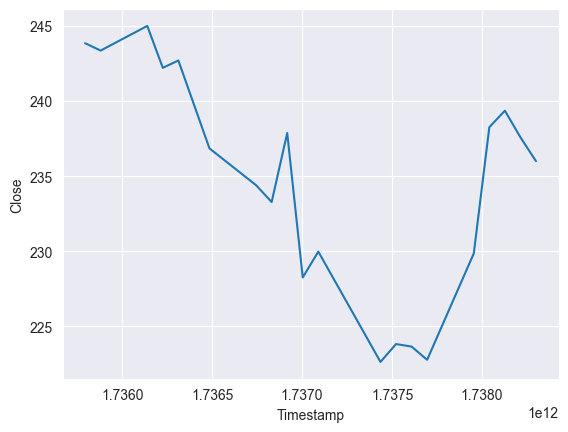

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_appl, x="timestamp", y="close")
plt.xlabel("Timestamp")
plt.ylabel("Close")

#### GOOGL

In [16]:
aggs_googl = []
for a in client.list_aggs(
    "GOOGL",
    1,
    "day",
    "2025-01-01",
    "2025-01-31",
    adjusted="true",
    sort="asc",
    limit=120,
):
    aggs_googl.append(a)

print(aggs_googl)

[Agg(open=190.65, high=192, low=187.5, close=189.43, volume=20370828.0, vwap=189.585, timestamp=1735794000000, transactions=328515, otc=None), Agg(open=191.37, high=193.21, low=189.975, close=191.79, volume=18596159.0, vwap=191.744, timestamp=1735880400000, transactions=261756, otc=None), Agg(open=193.98, high=198.2222, low=193.85, close=196.87, volume=29563638.0, vwap=196.6983, timestamp=1736139600000, transactions=385128, otc=None), Agg(open=197.11, high=201, low=194.6, close=195.49, volume=26487244.0, vwap=196.9118, timestamp=1736226000000, transactions=363663, otc=None), Agg(open=192.57, high=196.29, low=192.38, close=193.95, volume=24864766.0, vwap=194.3292, timestamp=1736312400000, transactions=339162, otc=None), Agg(open=194.295, high=196.52, low=190.31, close=192.04, volume=26665206.0, vwap=192.7975, timestamp=1736485200000, transactions=379247, otc=None), Agg(open=190.07, high=191.18, low=187.36, close=191.01, volume=21823699.0, vwap=190.091, timestamp=1736744400000, transacti

In [17]:
aggs_googl_list = [agg.__dict__ for agg in aggs_googl]
aggs_googl_list

[{'open': 190.65,
  'high': 192,
  'low': 187.5,
  'close': 189.43,
  'volume': 20370828.0,
  'vwap': 189.585,
  'timestamp': 1735794000000,
  'transactions': 328515,
  'otc': None},
 {'open': 191.37,
  'high': 193.21,
  'low': 189.975,
  'close': 191.79,
  'volume': 18596159.0,
  'vwap': 191.744,
  'timestamp': 1735880400000,
  'transactions': 261756,
  'otc': None},
 {'open': 193.98,
  'high': 198.2222,
  'low': 193.85,
  'close': 196.87,
  'volume': 29563638.0,
  'vwap': 196.6983,
  'timestamp': 1736139600000,
  'transactions': 385128,
  'otc': None},
 {'open': 197.11,
  'high': 201,
  'low': 194.6,
  'close': 195.49,
  'volume': 26487244.0,
  'vwap': 196.9118,
  'timestamp': 1736226000000,
  'transactions': 363663,
  'otc': None},
 {'open': 192.57,
  'high': 196.29,
  'low': 192.38,
  'close': 193.95,
  'volume': 24864766.0,
  'vwap': 194.3292,
  'timestamp': 1736312400000,
  'transactions': 339162,
  'otc': None},
 {'open': 194.295,
  'high': 196.52,
  'low': 190.31,
  'close': 19

In [18]:
df_googl = pd.DataFrame(aggs_googl_list)
df_googl

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,190.650,192.0000,187.5000,189.43,20370828.0,189.5850,1735794000000,328515,None
1,191.370,193.2100,189.9750,191.79,18596159.0,191.7440,1735880400000,261756,None
2,193.980,198.2222,193.8500,196.87,29563638.0,196.6983,1736139600000,385128,None
3,197.110,201.0000,194.6000,195.49,26487244.0,196.9118,1736226000000,363663,None
4,192.570,196.2900,192.3800,193.95,24864766.0,194.3292,1736312400000,339162,None
5,194.295,196.5200,190.3100,192.04,26665206.0,192.7975,1736485200000,379247,None
6,190.070,191.1800,187.3600,191.01,21823699.0,190.0910,1736744400000,299678,None
7,191.240,191.9800,188.3082,189.66,17174854.0,190.0464,1736830800000,236897,None
8,193.090,196.3600,191.8600,195.55,21775969.0,194.8156,1736917200000,270843,None
9,194.140,195.4800,192.8100,192.91,17815432.0,193.8050,1737003600000,243139,None


Text(0, 0.5, 'Close')

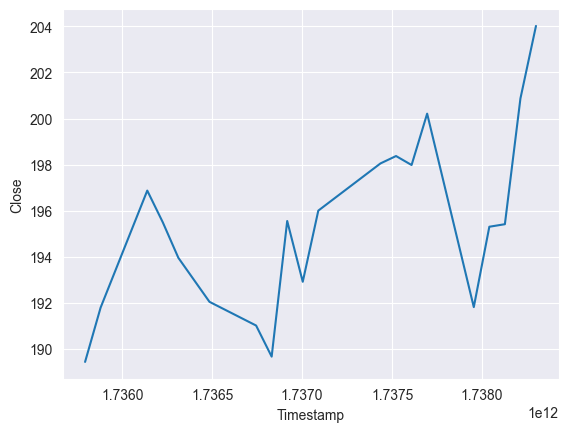

In [19]:
sns.lineplot(data=df_googl, x="timestamp", y="close")

plt.xlabel("Timestamp")
plt.ylabel("Close")

### Getting All Tickers

In [6]:
grouped = client.get_grouped_daily_aggs(
    "2025-09-08",
    adjusted="true",
)
grouped

[GroupedDailyAgg(ticker='ENOV', open=32.01, high=32.04, low=31.1, close=31.4, volume=726955, vwap=31.3649, timestamp=1757361600000, transactions=13652, otc=None),
 GroupedDailyAgg(ticker='PGJ', open=31.48, high=31.63, low=31.26, close=31.6099, volume=31639, vwap=31.4431, timestamp=1757361600000, transactions=275, otc=None),
 GroupedDailyAgg(ticker='PRTS', open=1.12, high=1.17, low=0.9604, close=1.06, volume=1549524.0, vwap=1.0915, timestamp=1757361600000, transactions=4583, otc=None),
 GroupedDailyAgg(ticker='DHAI', open=0.229, high=0.2374, low=0.2202, close=0.2229, volume=5759674.0, vwap=0.2286, timestamp=1757361600000, transactions=3100, otc=None),
 GroupedDailyAgg(ticker='ASB', open=26.54, high=26.645, low=26.165, close=26.53, volume=1632852.0, vwap=26.4687, timestamp=1757361600000, transactions=19753, otc=None),
 GroupedDailyAgg(ticker='INDS', open=37.48, high=37.48, low=37.075, close=37.3529, volume=10368, vwap=37.2244, timestamp=1757361600000, transactions=201, otc=None),
 Groupe

In [53]:
len(grouped) / 5 / 60

38.026666666666664

In [7]:
tickers_list = [ticker.__dict__['ticker'] for ticker in grouped]
tickers_list

['ENOV',
 'PGJ',
 'PRTS',
 'DHAI',
 'ASB',
 'INDS',
 'NRXS',
 'GERN',
 'TLT',
 'EQX',
 'AMZU',
 'SION',
 'MIRM',
 'NNOX',
 'BMAX',
 'FNGG',
 'PRDO',
 'EFSC',
 'GYRO',
 'VT',
 'CMRC',
 'VRRM',
 'CRF',
 'BOF',
 'AERT',
 'KTOS',
 'LC',
 'CCD',
 'NVX',
 'PMIO',
 'XCCC',
 'AQN',
 'VCRM',
 'SLJY',
 'VLO',
 'SOYB',
 'IYK',
 'PTNQ',
 'FOSLL',
 'CALF',
 'QQEW',
 'ISPC',
 'APLD',
 'ETSY',
 'WTGUR',
 'CLOZ',
 'QNTM',
 'TOI',
 'SFLR',
 'HYDW',
 'EDBL',
 'BWFG',
 'XNTK',
 'PMTS',
 'DIVB',
 'NMFCZ',
 'LEAD',
 'DWX',
 'BITC',
 'NIXX',
 'DSGX',
 'INEQ',
 'PID',
 'FXE',
 'ETHV',
 'CHTR',
 'UHG',
 'RPHS',
 'NSPR',
 'TSLG',
 'TDAQ',
 'FSIG',
 'NVD',
 'ARKG',
 'AGIX',
 'RZLV',
 'SUSA',
 'SENS',
 'CXAI',
 'INTC',
 'XENE',
 'ACCO',
 'GSIW',
 'ABT',
 'AAOI',
 'WAI',
 'FFGX',
 'CTA',
 'PLTD',
 'QNST',
 'PEY',
 'BKF',
 'FIW',
 'MYPS',
 'ELVA',
 'DOG',
 'MPB',
 'CAPR',
 'HEQT',
 'LEGN',
 'SITC',
 'DWM',
 'AVEM',
 'CUT',
 'BIIB',
 'TYO',
 'CGTX',
 'RCEL',
 'FITBI',
 'RFIL',
 'VTES',
 'GMET',
 'FRGT',
 'VEGN',
 '

### Getting Anual Data

In [34]:
aggs_googl = []
for a in client.list_aggs(
    "GOOGL",
    1,
    "day",
    "2024-01-01",
    "2024-12-31",
    adjusted="true",
    sort="asc",
    limit=120,
):
    aggs_googl.append(a)

print(aggs_googl)

[Agg(open=138.55, high=139.45, low=136.48, close=138.17, volume=23711220.0, vwap=137.7743, timestamp=1704171600000, transactions=313941, otc=None), Agg(open=137.25, high=139.63, low=137.08, close=138.92, volume=24212147.0, vwap=138.7415, timestamp=1704258000000, transactions=271651, otc=None), Agg(open=138.42, high=139.16, low=136.35, close=136.39, volume=27137735.0, vwap=137.2931, timestamp=1704344400000, transactions=278803, otc=None), Agg(open=136.745, high=137.1558, low=135.15, close=135.73, volume=22513854.0, vwap=135.9907, timestamp=1704430800000, transactions=254931, otc=None), Agg(open=136.29, high=139.01, low=136.26, close=138.84, volume=21403982.0, vwap=138.0736, timestamp=1704690000000, transactions=251454, otc=None), Agg(open=138.5, high=141.485, low=138.15, close=140.95, volume=24759598.0, vwap=140.4414, timestamp=1704776400000, transactions=309524, otc=None), Agg(open=141, high=143, low=140.91, close=142.28, volume=21320203.0, vwap=142.0843, timestamp=1704862800000, trans

In [35]:
len(aggs_googl)

252

In [39]:
aggs_googl_list = [agg.__dict__ for agg in aggs_googl]
aggs_googl_list

[{'open': 138.55,
  'high': 139.45,
  'low': 136.48,
  'close': 138.17,
  'volume': 23711220.0,
  'vwap': 137.7743,
  'timestamp': 1704171600000,
  'transactions': 313941,
  'otc': None},
 {'open': 137.25,
  'high': 139.63,
  'low': 137.08,
  'close': 138.92,
  'volume': 24212147.0,
  'vwap': 138.7415,
  'timestamp': 1704258000000,
  'transactions': 271651,
  'otc': None},
 {'open': 138.42,
  'high': 139.16,
  'low': 136.35,
  'close': 136.39,
  'volume': 27137735.0,
  'vwap': 137.2931,
  'timestamp': 1704344400000,
  'transactions': 278803,
  'otc': None},
 {'open': 136.745,
  'high': 137.1558,
  'low': 135.15,
  'close': 135.73,
  'volume': 22513854.0,
  'vwap': 135.9907,
  'timestamp': 1704430800000,
  'transactions': 254931,
  'otc': None},
 {'open': 136.29,
  'high': 139.01,
  'low': 136.26,
  'close': 138.84,
  'volume': 21403982.0,
  'vwap': 138.0736,
  'timestamp': 1704690000000,
  'transactions': 251454,
  'otc': None},
 {'open': 138.5,
  'high': 141.485,
  'low': 138.15,
  'c

In [40]:
df_googl = pd.DataFrame(aggs_googl_list)
df_googl

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,138.550,139.4500,136.480,138.17,23711220.0,137.7743,1704171600000,313941,None
1,137.250,139.6300,137.080,138.92,24212147.0,138.7415,1704258000000,271651,None
2,138.420,139.1600,136.350,136.39,27137735.0,137.2931,1704344400000,278803,None
3,136.745,137.1558,135.150,135.73,22513854.0,135.9907,1704430800000,254931,None
4,136.290,139.0100,136.260,138.84,21403982.0,138.0736,1704690000000,251454,None
...,...,...,...,...,...,...,...,...,...
247,194.840,196.1100,193.780,196.11,10403259.0,195.5292,1735016400000,155818,None
248,195.150,196.7480,194.375,195.60,12057210.0,195.8087,1735189200000,196317,None
249,194.950,195.3200,190.650,192.76,18891362.0,192.4079,1735275600000,284116,None
250,189.800,192.5500,189.120,191.24,14264659.0,191.1967,1735534800000,255690,None


Text(0, 0.5, 'Close')

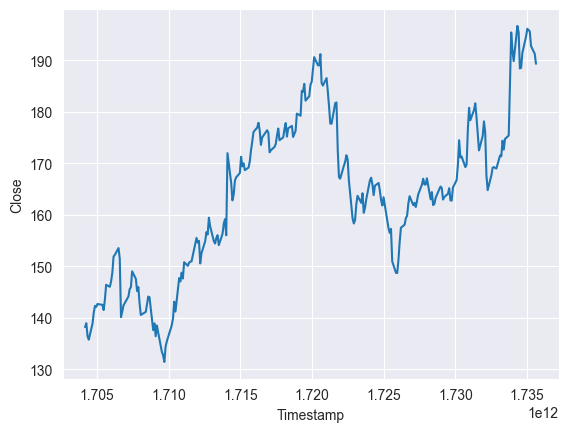

In [41]:
sns.lineplot(data=df_googl, x="timestamp", y="close")

plt.xlabel("Timestamp")
plt.ylabel("Close")

### Get Stock Data by Interval Function

#### Error

In [59]:
from typing import List

def get_stock_data(polygon_client, list_stocks: List[str], start_date: str, end_date: str) -> List:
    all_stocks = []
    limit_request_per_minute = 5
    for i, stock in enumerate(list_stocks):
        list_stocks_data = []
        for stock_data in polygon_client.list_aggs(
            stock,
            1,
            "day",
            start_date,
            end_date,
            adjusted="true",
            sort="asc",
            limit=120,
        ):
            list_stocks_data.append(stock_data)
        all_stocks.append(list_stocks_data)
        print(f'Stock {stock} collected.')
        print('Sleeping...')
        time.sleep(12)
    return all_stocks

#### Work

In [4]:
from typing import List

def get_stock_data_robust(
    polygon_client: RESTClient,
    list_stocks: List[str],
    start_date: str,
    end_date: str
) -> List:
    """
    Return stocks data by interval
    Args:
        polygon_client: Polygon client to access data
        list_stocks: list of stocks to get data for
        start_date: start date to get data for
        end_date: end date to get data for

    Returns: A list of stocks data

    """
    all_stocks_data = {}

    for stock_ticker in list_stocks:
        retries = 3
        while retries > 0:
            try:
                print(f"Coletando dados para o ticker: {stock_ticker}...")
                aggs = polygon_client.list_aggs(
                    ticker=stock_ticker,
                    multiplier=1,
                    timespan="day",
                    from_=start_date,
                    to=end_date,
                    adjusted=True,
                    sort="asc",
                    limit=50000
                )

                all_stocks_data[stock_ticker] = list(aggs)

                print(f"✅ Dados para {stock_ticker} coletados com sucesso.")

                time.sleep(12.5)

                break

            except Exception as e:
                print(f"❌ Ocorreu um erro com {stock_ticker}: {e}")
                retries = 0
                break

    return all_stocks_data


In [8]:
all_stocks = get_stock_data_robust(client, tickers_list[:50], '2024-01-01', '2024-12-31')

Coletando dados para o ticker: ENOV...
✅ Dados para ENOV coletados com sucesso.
Coletando dados para o ticker: PGJ...
✅ Dados para PGJ coletados com sucesso.
Coletando dados para o ticker: PRTS...
✅ Dados para PRTS coletados com sucesso.
Coletando dados para o ticker: DHAI...
✅ Dados para DHAI coletados com sucesso.
Coletando dados para o ticker: ASB...
✅ Dados para ASB coletados com sucesso.
Coletando dados para o ticker: INDS...
✅ Dados para INDS coletados com sucesso.
Coletando dados para o ticker: NRXS...
✅ Dados para NRXS coletados com sucesso.
Coletando dados para o ticker: GERN...
✅ Dados para GERN coletados com sucesso.
Coletando dados para o ticker: TLT...
✅ Dados para TLT coletados com sucesso.
Coletando dados para o ticker: EQX...
✅ Dados para EQX coletados com sucesso.
Coletando dados para o ticker: AMZU...
✅ Dados para AMZU coletados com sucesso.
Coletando dados para o ticker: SION...
✅ Dados para SION coletados com sucesso.
Coletando dados para o ticker: MIRM...
✅ Dados p

## Transforming Stock Data in Dataframe

In [9]:
all_stocks.keys()

dict_keys(['ENOV', 'PGJ', 'PRTS', 'DHAI', 'ASB', 'INDS', 'NRXS', 'GERN', 'TLT', 'EQX', 'AMZU', 'SION', 'MIRM', 'NNOX', 'BMAX', 'FNGG', 'PRDO', 'EFSC', 'GYRO', 'VT', 'CMRC', 'VRRM', 'CRF', 'BOF', 'AERT', 'KTOS', 'LC', 'CCD', 'NVX', 'PMIO', 'XCCC', 'AQN', 'VCRM', 'SLJY', 'VLO', 'SOYB', 'IYK', 'PTNQ', 'FOSLL', 'CALF', 'QQEW', 'ISPC', 'APLD', 'ETSY', 'WTGUR', 'CLOZ', 'QNTM', 'TOI', 'SFLR', 'HYDW'])

In [10]:
all_stocks['GERN']

[Agg(open=2.1, high=2.23, low=2.08, close=2.14, volume=4810251.0, vwap=2.1606, timestamp=1704171600000, transactions=12245, otc=None),
 Agg(open=2.14, high=2.14, low=1.985, close=2.01, volume=6953593.0, vwap=2.022, timestamp=1704258000000, transactions=14533, otc=None),
 Agg(open=2.03, high=2.14, low=2.01, close=2.09, volume=5201333.0, vwap=2.0883, timestamp=1704344400000, transactions=9071, otc=None),
 Agg(open=2.1, high=2.1, low=1.97, close=2.01, volume=4823988.0, vwap=2.0034, timestamp=1704430800000, transactions=14788, otc=None),
 Agg(open=2, high=2.16, low=1.97, close=2.15, volume=5469130.0, vwap=2.0966, timestamp=1704690000000, transactions=11757, otc=None),
 Agg(open=2.11, high=2.16, low=2.045, close=2.11, volume=5317115.0, vwap=2.1056, timestamp=1704776400000, transactions=11883, otc=None),
 Agg(open=2.1, high=2.19, low=2.04, close=2.08, volume=3052483.0, vwap=2.0799, timestamp=1704862800000, transactions=8645, otc=None),
 Agg(open=2.06, high=2.06, low=1.98, close=2.01, volume=

In [11]:
type(all_stocks['GERN'][0])

polygon.rest.models.aggs.Agg

In [12]:
for stock in all_stocks.keys():
    print(f'Transforming {stock} to dict...')
    all_stocks[stock] = [agg.__dict__ for agg in all_stocks[stock]]

Transforming ENOV to dict...
Transforming PGJ to dict...
Transforming PRTS to dict...
Transforming DHAI to dict...
Transforming ASB to dict...
Transforming INDS to dict...
Transforming NRXS to dict...
Transforming GERN to dict...
Transforming TLT to dict...
Transforming EQX to dict...
Transforming AMZU to dict...
Transforming SION to dict...
Transforming MIRM to dict...
Transforming NNOX to dict...
Transforming BMAX to dict...
Transforming FNGG to dict...
Transforming PRDO to dict...
Transforming EFSC to dict...
Transforming GYRO to dict...
Transforming VT to dict...
Transforming CMRC to dict...
Transforming VRRM to dict...
Transforming CRF to dict...
Transforming BOF to dict...
Transforming AERT to dict...
Transforming KTOS to dict...
Transforming LC to dict...
Transforming CCD to dict...
Transforming NVX to dict...
Transforming PMIO to dict...
Transforming XCCC to dict...
Transforming AQN to dict...
Transforming VCRM to dict...
Transforming SLJY to dict...
Transforming VLO to dict...

In [14]:
import pandas as pd

for stock in all_stocks.keys():
    print(f'Transforming {stock} to dataframe...')
    all_stocks[stock] = pd.DataFrame(all_stocks[stock])

Transforming ENOV to dataframe...
Transforming PGJ to dataframe...
Transforming PRTS to dataframe...
Transforming DHAI to dataframe...
Transforming ASB to dataframe...
Transforming INDS to dataframe...
Transforming NRXS to dataframe...
Transforming GERN to dataframe...
Transforming TLT to dataframe...
Transforming EQX to dataframe...
Transforming AMZU to dataframe...
Transforming SION to dataframe...
Transforming MIRM to dataframe...
Transforming NNOX to dataframe...
Transforming BMAX to dataframe...
Transforming FNGG to dataframe...
Transforming PRDO to dataframe...
Transforming EFSC to dataframe...
Transforming GYRO to dataframe...
Transforming VT to dataframe...
Transforming CMRC to dataframe...
Transforming VRRM to dataframe...
Transforming CRF to dataframe...
Transforming BOF to dataframe...
Transforming AERT to dataframe...
Transforming KTOS to dataframe...
Transforming LC to dataframe...
Transforming CCD to dataframe...
Transforming NVX to dataframe...
Transforming PMIO to dataf

In [15]:
import os

os.makedirs('data', exist_ok=True)

start_date, end_date = '2024-01-01', '2024-12-31'
for stock in all_stocks.keys():
    print(f'Saving {stock} to parquet...')
    all_stocks[stock].to_parquet(f'data/{stock}_{start_date}_to_{end_date}.parquet')

Saving ENOV to parquet...
Saving PGJ to parquet...
Saving PRTS to parquet...
Saving DHAI to parquet...
Saving ASB to parquet...
Saving INDS to parquet...
Saving NRXS to parquet...
Saving GERN to parquet...
Saving TLT to parquet...
Saving EQX to parquet...
Saving AMZU to parquet...
Saving SION to parquet...
Saving MIRM to parquet...
Saving NNOX to parquet...
Saving BMAX to parquet...
Saving FNGG to parquet...
Saving PRDO to parquet...
Saving EFSC to parquet...
Saving GYRO to parquet...
Saving VT to parquet...
Saving CMRC to parquet...
Saving VRRM to parquet...
Saving CRF to parquet...
Saving BOF to parquet...
Saving AERT to parquet...
Saving KTOS to parquet...
Saving LC to parquet...
Saving CCD to parquet...
Saving NVX to parquet...
Saving PMIO to parquet...
Saving XCCC to parquet...
Saving AQN to parquet...
Saving VCRM to parquet...
Saving SLJY to parquet...
Saving VLO to parquet...
Saving SOYB to parquet...
Saving IYK to parquet...
Saving PTNQ to parquet...
Saving FOSLL to parquet...


## Analyse GERN Stock

### GERN Stock Description
GERN (Geron Corporation) is a commercial-stage biopharmaceutical company focused on developing treatments for blood cancers, specifically Myelodysplastic Syndromes (MDS) and Myelofibrosis. The company's primary product, RYTELO (imetelstat), is a telomerase inhibitor approved for certain adult patients with lower-risk MDS. Geron is exploring further applications for imetelstat in other blood-related cancers, with revenue generated from RYTELO sales and collaboration agreements.

In [16]:
df_gern = all_stocks['GERN']
df_gern

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,2.10,2.230,2.080,2.14,4810251.0,2.1606,1704171600000,12245,None
1,2.14,2.140,1.985,2.01,6953593.0,2.0220,1704258000000,14533,None
2,2.03,2.140,2.010,2.09,5201333.0,2.0883,1704344400000,9071,None
3,2.10,2.100,1.970,2.01,4823988.0,2.0034,1704430800000,14788,None
4,2.00,2.160,1.970,2.15,5469130.0,2.0966,1704690000000,11757,None
...,...,...,...,...,...,...,...,...,...
246,3.34,3.350,3.280,3.34,5595677.0,3.3172,1735016400000,16060,None
247,3.30,3.335,3.260,3.30,20871209.0,3.2976,1735189200000,28101,None
248,3.29,3.400,3.200,3.35,34022870.0,3.2514,1735275600000,43694,None
249,3.34,3.425,3.230,3.40,23769669.0,3.3873,1735534800000,27829,None


### Describe Statistics of GERN Stock Close Value on 2024

In [19]:
print(f"Stock Close Value Mean on 2024: {df_gern['close'].mean():.2f}")

Stock Close Value Mean on 2024: 3.69


In [20]:
print(f"Stock Close Value STD on 2024: {df_gern['close'].std():.2f}")

Stock Close Value STD on 2024: 0.93


In [23]:
print(f"Stock Close Value Max on 2024: {df_gern['close'].max():.2f}")

Stock Close Value Max on 2024: 5.09


In [24]:
print(f"Stock Close Value Min on 2024: {df_gern['close'].min():.2f}")

Stock Close Value Min on 2024: 1.75


In [25]:
print(f"Stock Close Value Median on 2024: {df_gern['close'].median():.2f}")

Stock Close Value Median on 2024: 3.97


In [28]:
min_timestamp_idx = df_gern['timestamp'].idxmin()
max_timestamp_idx = df_gern['timestamp'].idxmax()

In [31]:
start_close_value = df_gern.iloc[min_timestamp_idx]['close']
print(f'Close value on start of 2024: {start_close_value:.2f}')

Start value on start of 2024: 2.14


In [32]:
end_close_value = df_gern.iloc[max_timestamp_idx]['close']
print(f'Close value on end of 2024: {end_close_value:.2f}')

Close value on end of 2024: 3.54


### GERN Stock Plots

<Axes: xlabel='close'>

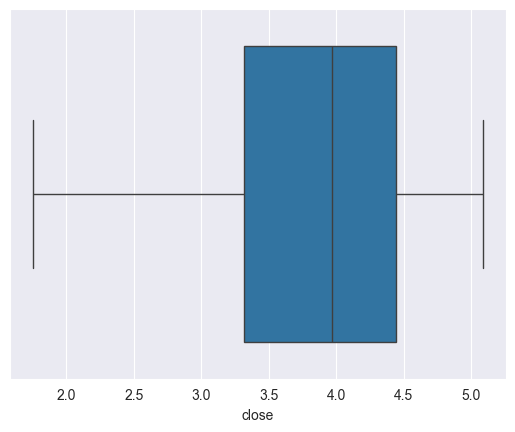

In [26]:
import seaborn as sns

sns.boxplot(data=df_gern, x="close")

<Axes: xlabel='close', ylabel='Count'>

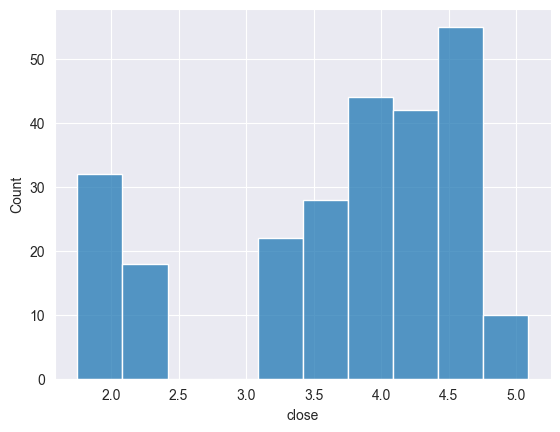

In [27]:
sns.histplot(data=df_gern, x="close")

Very low deviation to left, that stock stay between 3.2 and 4.4 dolars

<Axes: xlabel='timestamp', ylabel='close'>

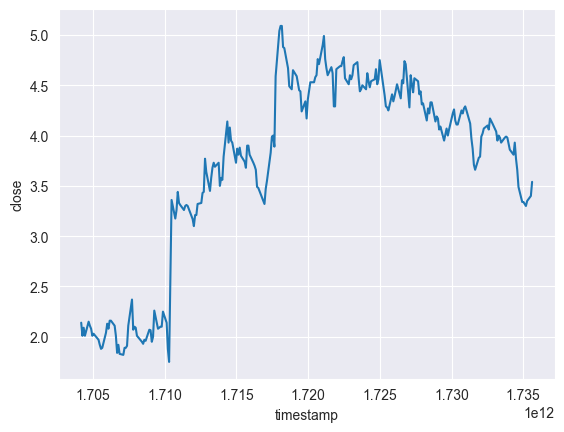

In [33]:
sns.lineplot(data=df_gern, x="timestamp", y="close")

## Brapi API

In [20]:
import requests

brapi_api_key = os.getenv("BRAPI_API_KEY")

# Para ações de teste (sem token)
url = "https://brapi.dev/api/quote/PETR4,MGLU3"
response = requests.get(url, params={"range": "1mo", "interval": "1d"})
response.json()

{'results': [{'currency': 'BRL',
   'marketCap': 418396174435,
   'shortName': 'PETROBRAS   PN      N2',
   'longName': 'Petróleo Brasileiro S.A. - Petrobras',
   'regularMarketChange': 0.41,
   'regularMarketChangePercent': 1.335,
   'regularMarketTime': '2025-09-09T18:46:08.000Z',
   'regularMarketPrice': 31.12,
   'regularMarketDayHigh': 31.15,
   'regularMarketDayRange': '30.81 - 31.15',
   'regularMarketDayLow': 30.81,
   'regularMarketVolume': 21618500,
   'regularMarketPreviousClose': 30.71,
   'regularMarketOpen': 31.1,
   'fiftyTwoWeekRange': '28.86 - 40.76',
   'fiftyTwoWeekLow': 28.86,
   'fiftyTwoWeekHigh': 40.76,
   'symbol': 'PETR4',
   'logourl': 'https://icons.brapi.dev/icons/PETR4.svg',
   'usedInterval': '1d',
   'usedRange': '1mo',
   'historicalDataPrice': [{'date': 1754917200,
     'open': 30.71,
     'high': 31.03,
     'low': 30.58,
     'close': 30.72,
     'volume': 28045800,
     'adjustedClose': 30.0385},
    {'date': 1755003600,
     'open': 30.79,
     'hig

### Get All Stocks

In [21]:
url = "https://brapi.dev/api/quote/list"
response = requests.get(
    url,
    headers={"Authorization": f"Bearer {brapi_api_key}"},
    params={"range": "1mo", "interval": "1d"}
)

if response.status_code == 200:
    data = response.json()
    response.raise_for_status()
    print(data)
else:
    print(f"Erro: {response.status_code}")

{'indexes': [{'stock': '^AORD', 'name': 'ALL ORDINARIES'}, {'stock': '^BFX', 'name': 'BEL 20'}, {'stock': '^FCHI', 'name': 'CAC 40'}, {'stock': '^BUK100P', 'name': 'Cboe UK 100'}, {'stock': '^VIX', 'name': 'CBOE Volatility Index'}, {'stock': '^GDAXI', 'name': 'DAX PERFORMANCE-INDEX'}, {'stock': '^DJI', 'name': 'Dow Jones Industrial Average'}, {'stock': '^CASE30', 'name': 'EGX 30 Price Return Index'}, {'stock': '^STOXX50E', 'name': 'ESTX 50 PR.EUR'}, {'stock': '^N100', 'name': 'Euronext 100 Index'}, {'stock': '^FTSE', 'name': 'FTSE 100'}, {'stock': '^KLSE', 'name': 'FTSE Bursa Malaysia KLCI'}, {'stock': '^HSI', 'name': 'HANG SENG INDEX'}, {'stock': '^BVSP', 'name': 'IBOVESPA'}, {'stock': '^JKSE', 'name': 'IDX COMPOSITE'}, {'stock': 'IFIX.SA', 'name': 'IND FDO IMOB'}, {'stock': '^MXX', 'name': 'IPC MEXICO'}, {'stock': '^KS11', 'name': 'KOSPI Composite Index'}, {'stock': '^MERV', 'name': 'MERVAL'}, {'stock': '^IXIC', 'name': 'NASDAQ Composite'}, {'stock': '^N225', 'name': 'Nikkei 225'}, {